*Replace this text with your own name and a brief description of what this notebook does.*

## Homework 21-2: Linear regression for MoMA artwork size

This assignment uses the MoMA artwork dataset from Labs 5 and 19.  We will use linear regression to predict the height of oil paintings from their width.

1) Filter the data to make a new dataframe only containing oil paintings, which have "Oil on canvas" in the "Medium" column.

2) For the filtered data:

    a) compute a linear model with width as the independent variable and height as the dependent variable

    b) plot the scatter plot with the regression line

    c) plot the histogram of the residuals from (a)

Note:  The height and width columns have spaces in their name.  You can use these names directly in the formula  by surrounding them with Q(""), like this `Q("Height (cm)")`.  Then use single quotes around the formula.  Or, you can change just those two column names with the code:

`art_dataframe.rename(columns = {"Width (cm)":"width", "Height (cm)":"height"}, inplace = True)`

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf

art = pd.read_csv("https://github.com/MuseumofModernArt/collection/raw/master/Artworks.csv")
art.head()

,Title,Artist,ConstituentID,ArtistBio,Nationality,BeginDate,EndDate,Gender,Date,Medium,...,ThumbnailURL,Circumference (cm),Depth (cm),Diameter (cm),Height (cm),Length (cm),Weight (kg),Width (cm),Seat Height (cm),Duration (sec.)
0,"Ferdinandsbrücke Project, Vienna, Austria (Ele...",Otto Wagner,6210,"(Austrian, 1841–1918)",(Austrian),(1841),(1918),(Male),1896,Ink and cut-and-pasted painted pages on paper,...,http://www.moma.org/media/W1siZiIsIjUyNzc3MCJd...,NaN,NaN,NaN,48.6000,NaN,NaN,168.9000,NaN,NaN
1,"City of Music, National Superior Conservatory ...",Christian de Portzamparc,7470,"(French, born 1944)",(French),(1944),(0),(Male),1987,Paint and colored pencil on print,...,http://www.moma.org/media/W1siZiIsIjUyNzM3NCJd...,NaN,NaN,NaN,40.6401,NaN,NaN,29.8451,NaN,NaN
2,"Villa near Vienna Project, Outside Vienna, Aus...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),(Male),1903,"Graphite, pen, color pencil, ink, and gouache ...",...,http://www.moma.org/media/W1siZiIsIjUyNzM3NSJd...,NaN,NaN,NaN,34.3000,NaN,NaN,31.8000,NaN,NaN
3,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,7056,"(French and Swiss, born Switzerland 1944)",(),(1944),(0),(Male),1980,Photographic reproduction with colored synthet...,...,http://www.moma.org/media/W1siZiIsIjUyNzQ3NCJd...,NaN,NaN,NaN,50.8000,NaN,NaN,50.8000,NaN,NaN
4,"Villa, project, outside Vienna, Austria, Exter...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),(Male),1903,"Graphite, color pencil, ink, and gouache on tr...",...,http://www.moma.org/media/W1siZiIsIjUyNzQ3NSJd...,NaN,NaN,NaN,38.4000,NaN,NaN,19.1000,NaN,NaN


In [5]:
oil_filter = art["Medium"] == "Oil on canvas"
oil_paintings = art[oil_filter]

In [6]:
lm = smf.ols(formula = 'Q("Height (cm)") ~ Q("Width (cm)")', data = oil_paintings).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Q("Height (cm)")   R-squared:                       0.549
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     1289.
Date:                Sat, 11 Nov 2023   Prob (F-statistic):          2.66e-185
Time:                        14:54:50   Log-Likelihood:                -5491.0
No. Observations:                1061   AIC:                         1.099e+04
Df Residuals:                    1059   BIC:                         1.100e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          42.7356      2.471     17.292      0.000      37.886      47.585
Q("Width (cm)")     0.6511      0.018     35.901      0.000       0.615       0.687
==============================================================================
Omnibus:                      207.443   Durbin-Watson:                   1.806
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1369.722
Skew:                           0.722   Prob(JB):                    3.70e-298
Kurtosis:                       8.376   Cond. No.                         256.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='Width (cm)', ylabel='Height (cm)'>

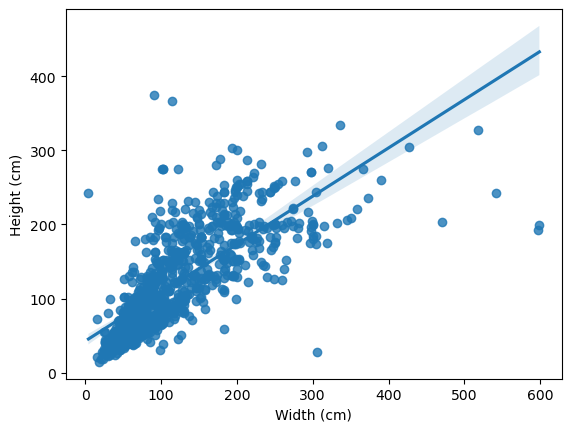

In [7]:
sns.regplot(x = "Width (cm)", y = "Height (cm)", data = oil_paintings)

<Axes: >

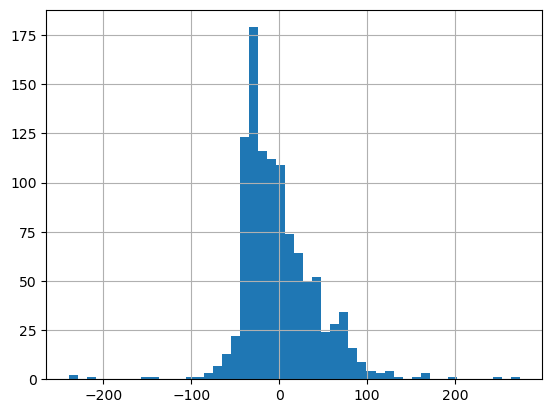

In [9]:
lm.resid.hist(bins =50)

1. What is the equation of the linear regression line?
2. Based on your scatterplot and histogram of the residuals, do you think this linear model is a good fit?

Write your answers below.

1. y = 0.6511x + 42.7356
2. From the scatterplot, the relationship between width and height of oil paintings appears to be roughly linear.  However, for very small widths, the heights are often less than what is predicted by the linear model.  This error might also be reflected in the histogram of the residuals, which is roughly normal, but seems to have some more negative values than expected.  Thus the fit of the linear model is generally good, but may have problems predicting certain heights.